Regression model

In [1]:
%pip install seaborn
%pip install librosa
%pip install soundfile
%pip install torch
%pip install torchaudio
%pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
%pip install skl2onnx onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 113.7 MB/s eta 0:00:00


In [ ]:
cd "g:\내 드라이브\IAP_Final/PC/source"

g:\내 드라이브\IAP_Final\source


c:\Users\JUNE\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/MyDrive/IAP_Final/PC/source'

/content/drive/.shortcut-targets-by-id/10b_mTeA0LBn0XnIPn1kDV03ig94XXR0w/IAP_Final/PC/source


(840,)
(840, 256)
✅ Accuracy: 0.6394557823129252

📄 Classification Report:
              precision    recall  f1-score   support

          낮음       0.50      0.66      0.57        53
          높음       0.77      0.63      0.69        94

    accuracy                           0.64       147
   macro avg       0.63      0.64      0.63       147
weighted avg       0.67      0.64      0.65       147



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45458 (\N{HANGUL SYLLABLE NOP}) missing from font(s) DejaVu Sans.
  fig.canva

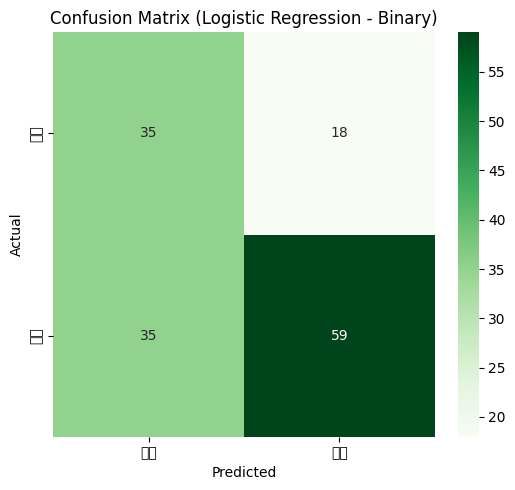

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)


# 1. .npz 불러오기
voices_npz = np.load("./vectors/voice_vectors.npz")
songs_npz = np.load("./vectors/music_vectors.npz")
y = np.load("./vectors/y_vectors.npz")["y"]  # (M, N)

# 2. y.shape 기반으로 키 자르기
M, N = y.shape
voice_keys = voices_npz.files[:M]
song_keys = songs_npz.files[:N]

# 3. 벡터 배열 생성
voices = np.stack([voices_npz[k] for k in voice_keys])  # (M, 128)
songs  = np.stack([songs_npz[k] for k in song_keys])    # (N, 128)

# 4. 입력 벡터 구성
voice_repeated = np.repeat(voices, N, axis=0)           # (M×N, 128)
song_tiled     = np.tile(songs, (M, 1))                 # (M×N, 128)
X              = np.hstack([voice_repeated, song_tiled])  # (M×N, 256)
y_flat         = y.flatten()                            # (M×N,)

print(y_flat.shape)
print(X.shape)

# 5. NaN 제거
valid_indices = ~np.isnan(y_flat)
X_valid = X[valid_indices]
y_valid = y_flat[valid_indices]

# 6. y를 2단계 분류 (0.5 기준)로 변환
y_binary = np.where(y_valid < 0.5, 0, 1)  # 0: 낮음, 1: 높음

# 7. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_valid)

# 8. 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=12
)

# 9. 로지스틱 회귀 모델 학습
model = LogisticRegression(
    solver='lbfgs',
    max_iter=50,
    class_weight='balanced',  # 데이터 불균형 대응
    random_state=31
)
model.fit(X_train, y_train)
 #10. 예측 및 평가
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["낮음", "높음"]))
# 11. 혼동 행렬 시각화
plt.figure(figsize=(5.5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens",
            xticklabels=["낮음", "높음"], yticklabels=["낮음", "높음"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression - Binary)")
plt.tight_layout()
plt.show()


✅ Accuracy: 0.7142857142857143

📄 Classification Report:
              precision    recall  f1-score   support

          낮음       0.59      0.68      0.63        53
          높음       0.80      0.73      0.77        94

    accuracy                           0.71       147
   macro avg       0.70      0.71      0.70       147
weighted avg       0.73      0.71      0.72       147



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45458 (\N{HANGUL SYLLABLE NOP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: Us

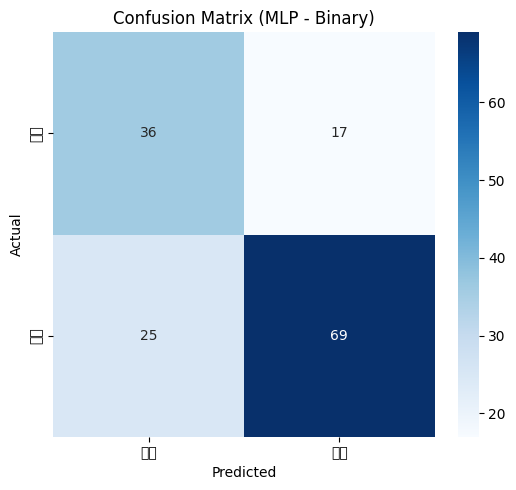

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import joblib

# 1. .npz 불러오기
voices_npz = np.load("./vectors/voice_vectors.npz")
songs_npz = np.load("./vectors/music_vectors.npz")
y = np.load("./vectors/y_vectors.npz")["y"]  # (M, N)

# 2. y.shape 기반으로 키 자르기
M, N = y.shape
voice_keys = voices_npz.files[:M]
song_keys = songs_npz.files[:N]

# 3. 벡터 배열 생성
voices = np.stack([voices_npz[k] for k in voice_keys])  # (M, 128)
songs  = np.stack([songs_npz[k] for k in song_keys])    # (N, 128)

# 4. 입력 벡터 구성
voice_repeated = np.repeat(voices, N, axis=0)           # (M×N, 128)
song_tiled     = np.tile(songs, (M, 1))                 # (M×N, 128)
X              = np.hstack([voice_repeated, song_tiled])  # (M×N, 256)
y_flat         = y.flatten()                            # (M×N, 1)

# 5. NaN 제거
valid_indices = ~np.isnan(y_flat)
X_valid = X[valid_indices]
y_valid = y_flat[valid_indices]

# 6. y를 2단계 분류 (0.5 기준)로 변환
y_binary = np.where(y_valid < 0.5, 0, 1)

# 7. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_valid)

# 8. 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=12
)

# 9. MLP 모델 학습
model = MLPClassifier(
    hidden_layer_sizes=(128,),  # 은닉층 1개, 노드 128개
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=31
)
model.fit(X_train, y_train)

# 10. 예측 및 평가
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["낮음", "높음"]))

# 11. 혼동 행렬 시각화
plt.figure(figsize=(5.5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["낮음", "높음"], yticklabels=["낮음", "높음"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (MLP - Binary)")
plt.tight_layout()
plt.show()

# 12. 모델 저장
joblib.dump(scaler, './model/MLP/scaler.pkl')
joblib.dump(model,  './model/MLP/model.pkl')

#import pickle
#import os
#os.makedirs('./model/MLP', exist_ok=True)
#
## 저장
#with open('./model/MLP/scaler.pkl', 'wb') as f:
#    pickle.dump(scaler, f)
#
#with open('./model/MLP/model.pkl', 'wb') as f:
#    pickle.dump(model, f)



In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

from sklearn.pipeline import Pipeline

# pipeline 정의
pipeline = Pipeline([
    ('scaler', scaler),
    ('mlp', model)
])

# 변환 옵션 설정
onnx_model = convert_sklearn(
    pipeline,
    initial_types=[('input', FloatTensorType([None, 256]))],
    options={id(pipeline): {
        "output_class_labels": True,
        "zipmap": False
    }}
)

# 저장
with open("./model/MLP/model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("✅ 확률 포함된 ONNX 모델 저장 완료")


✅ 확률 포함된 ONNX 모델 저장 완료


In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.pipeline import Pipeline

# 1. 파이프라인 구성 (scaler + model)
pipeline = Pipeline([
    ("scaler", scaler),
    ("mlp", model)
])

# 2. 입력 형태 지정 (여기선 256차원 float 벡터)
initial_type = [("input", FloatTensorType([None, X_valid.shape[1]]))]

# 3. 변환
onnx_model = convert_sklearn(pipeline, initial_types=initial_type)

# 4. 저장
with open("./model/MLP/model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("✅ ONNX 모델 저장 완료: ./model/MLP/model.onnx")


✅ ONNX 모델 저장 완료: ./model/MLP/model.onnx


이하 nano에 올릴 코드

In [ ]:
import os
import librosa
import soundfile as sf
from tqdm import tqdm
import numpy as np

def extract_highlight(input_dir="test/voice", output_dir="test/voice_clips", clip_duration=15.0):
    print("Extracting 15-second highlight segments...")
    os.makedirs(output_dir, exist_ok=True)

    files = [f for f in os.listdir(input_dir) if f.lower().endswith(".wav")]
    print(f"Found {len(files)} files to process.")

    for f in tqdm(files):
        input_path = os.path.join(input_dir, f)
        y, sr = librosa.load(input_path, sr=None)

        total_duration = len(y) / sr
        if total_duration < clip_duration:
            print(f"{f} is shorter than {clip_duration} seconds. Skipping.")
            continue

        clip_len_samples = int(clip_duration * sr)
        hop_length = sr

        max_energy = 0
        best_start = 0

        for start in range(0, len(y) - clip_len_samples, hop_length):
            segment = y[start:start + clip_len_samples]
            energy = np.sum(segment ** 2)
            if energy > max_energy:
                max_energy = energy
                best_start = start

        highlight = y[best_start:best_start + clip_len_samples]

        name_only = os.path.splitext(f)[0]
        trimmed_name = name_only[len("voice_only_"):] if name_only.startswith("voice_only_") else name_only
        output_filename = f"cliped_{trimmed_name}.wav"
        output_path = os.path.join(output_dir, output_filename)

        sf.write(output_path, highlight, sr)

    print("Highlight extraction complete.")



In [ ]:
import torch
import torchaudio
import torchaudio.transforms as T

def preprocess_for_vggish(wav_path, target_sample_rate=16000):
    # 1. 오디오 로드 및 리샘플링
    waveform, sr = torchaudio.load(wav_path)
    if sr != target_sample_rate:
        resampler = T.Resample(sr, target_sample_rate)
        waveform = resampler(waveform)

    # 2. 채널 평균 (Mono로 변환)
    if waveform.shape[0] > 1:
        waveform = waveform.mean(dim=0, keepdim=True)

    # 3. Mel Spectrogram (torchaudio의 설정은 VGGish에 맞게)
    mel_transform = T.MelSpectrogram(
        sample_rate=target_sample_rate,
        n_fft=400,
        win_length=400,
        hop_length=160,
        n_mels=64,
        f_min=125,
        f_max=7500,
        power=2.0
    )
    mel = mel_transform(waveform)  # (1, 64, T)

    # 4. dB 변환
    db_transform = T.AmplitudeToDB()
    mel_db = db_transform(mel)  # (1, 64, T)

    # 5. Frame 단위 자르기 (96x64)
    mel_db = mel_db.squeeze(0).transpose(0, 1)  # (T, 64)
    if mel_db.shape[0] < 96:
        # 패딩
        pad_len = 96 - mel_db.shape[0]
        mel_db = torch.nn.functional.pad(mel_db, (0, 0, 0, pad_len))
    else:
        mel_db = mel_db[:96, :]  # 앞에서부터 96 프레임 자름
    mel_db = mel_db.transpose(0, 1)
    mel_db = mel_db.unsqueeze(0)  # (1, 1, 96, 64)
    return mel_db


In [ ]:
import os
import torchaudio
import shutil
import onnxruntime
import numpy as np
def run_vggish_onnx(sess, mel_db):
    """
    mel_db: torch.Tensor of shape (1, 1, 96, 64)
    onnx_path: path to vggish.onnx
    """

    mel_spec_np = mel_db.numpy().astype(np.float32)

    # 입력 이름 확인
    input_name = sess.get_inputs()[0].name
    output_name = sess.get_outputs()[0].name

    # 추론
    outputs = sess.run([output_name], {input_name: mel_spec_np})
    embedding = outputs[0]  # shape: (1, 128)

    return embedding.squeeze()


In [ ]:
import os
import shutil
import numpy as np
import torchaudio
import onnxruntime
import re

def embedding(input_dir = "test/voice_clips", output_npz = "test/voice_vectors.npz", key_path=""):
# 설정
    onnx_path = "model/VGGish/audioset-vggish-3.onnx"

    # 0. 기존 벡터 불러오기 (있다면)
    audio_vectors = {}
    if os.path.exists(output_npz):
        existing = np.load(output_npz, allow_pickle=True)
        audio_vectors.update({k: existing[k] for k in existing.files})
        print(f"✅ 기존 벡터 {len(audio_vectors)}개 로드됨")

    # 1. ONNX 세션 생성
    sess = onnxruntime.InferenceSession(
        onnx_path,
        providers=["CUDAExecutionProvider", "CPUExecutionProvider"]
    )

    # 2. 벡터 추출 루프
    def order_key(reference_list_path=None):
        reference_order = {}
        if reference_list_path and os.path.exists(reference_list_path):
            with open(reference_list_path, "r", encoding="utf-8") as f:
                titles = [line.strip() for line in f]
                for idx, title in enumerate(titles):
                    filename = f"cliped_{title}.wav"
                    reference_order[filename] = idx

        def sort_key(filename):
            if filename in reference_order:
                return reference_order[filename]
            match = re.search(r"\((\d+)\)", filename)
            return int(match.group(1)) if match else float('inf')

        return sort_key

    for fname in sorted(os.listdir(input_dir), key=order_key(key_path)):
        if not fname.lower().endswith(".wav"):
            continue

        input_path = os.path.join(input_dir, fname)

        try:
            key = os.path.splitext(fname)[0]

            mel_db = preprocess_for_vggish(input_path, target_sample_rate=16000)
            audio_vectors[key] = run_vggish_onnx(sess, mel_db)

            moved_dir = "./"+input_dir+"/loaded_musics"
            os.makedirs(moved_dir, exist_ok=True)
            shutil.move(input_path, os.path.join(moved_dir, fname))

            print(f"✅ 처리 완료: {fname}")

        except Exception as e:
            print(f"❌ 실패: {fname} - {e}")

    # 3. .npz 저장
    np.savez(output_npz, **audio_vectors)
    print(f"\n💾 총 {len(audio_vectors)}개의 벡터 저장 완료 → {output_npz}")


In [ ]:
 # 사용자 음성 자르기
extract_highlight()
embedding()

Extracting 15-second highlight segments...
Found 3 files to process.


100%|██████████| 3/3 [00:13<00:00,  4.65s/it]


Highlight extraction complete.
✅ 기존 벡터 3개 로드됨


/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


✅ 처리 완료: cliped_user (7).wav
✅ 처리 완료: cliped_user (14).wav
✅ 처리 완료: cliped_신촌로 13 - 김장원.wav

💾 총 4개의 벡터 저장 완료 → test/voice_vectors.npz


In [ ]:
import joblib
import numpy as np

# 1) pkl 불러오기
scaler = joblib.load('./model/MLP/scaler.pkl')
model  = joblib.load('./model/MLP/model.pkl')

# 2) 새로운 벡터 로드/생성
import numpy as np
voices_npz = np.load("./test/voice_vectors.npz")
songs_npz  = np.load("./vectors/music_vectors.npz")

voice_keys = voices_npz.files[:M]
song_keys = songs_npz.files[:N]

M = len(voice_keys) # 60
N = len(song_keys)  # 3

print(f"{M}명의 목소리에 대해 {N}곡 중 추천하는 노래 탐색중")

# 3. 벡터 배열 생성
voices = np.stack([voices_npz[k] for k in voice_keys])  # (M, 128)
songs  = np.stack([songs_npz[k] for k in song_keys])    # (N, 128)

voice_repeated = np.repeat(voices, N, axis=0)           # (M×N, 128)
song_tiled     = np.tile(songs, (M, 1))                 # (M×N, 128)
X              = np.hstack([voice_repeated, song_tiled])  # (M×N, 256)

# 4) 스케일링
X_scaled = scaler.transform(X)

# 5) 예측
y_prob = model.predict_proba(X_scaled)[:,1]  # 양성(1)일 확률
y_pred = model.predict(X_scaled)             # 0 또는 1

# 6) 상위 K개 추천 출력
recommend = list(song_keys)  # 곡 이름 리스트
K = 5


for i, voice_id in enumerate(voice_keys):
    start = i * N
    end   = start + N
    probs = y_prob[start:end]
    preds = y_pred[start:end]

    # 확률 내림차순 정렬된 인덱스 상위 K개
    top_idx = np.argsort(probs)[::-1][:K]

    print(f"\n== 음성 '{voice_id}' 에 대한 추천 Top-{K} ==")
    for rank, idx in enumerate(top_idx, 1):
        song_name = recommend[idx]
        print(f"{rank}. {song_name} | 확률: {probs[idx]*100:.2f}% | 예측: {'좋음' if preds[idx]==1 else '나쁨'}")

4명의 목소리에 대해 60곡 중 추천하는 노래 탐색중

== 음성 'cliped_user (14)' 에 대한 추천 Top-5 ==
1. cliped_가시 - 버즈 | 확률: 95.38% | 예측: 좋음
2. cliped_그대에게 - 신해철 | 확률: 94.72% | 예측: 좋음
3. cliped_HAPPY - 데이식스 | 확률: 92.36% | 예측: 좋음
4. cliped_노래방에서 - 장범준 | 확률: 89.21% | 예측: 좋음
5. cliped_삐딱하게 - 지드래곤 | 확률: 87.97% | 예측: 좋음

== 음성 'cliped_신촌로 13 - 김장원' 에 대한 추천 Top-5 ==
1. cliped_노래방에서 - 장범준 | 확률: 82.34% | 예측: 좋음
2. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 81.28% | 예측: 좋음
3. cliped_봄여름가을겨울 - 빅뱅 | 확률: 79.63% | 예측: 좋음
4. cliped_가시 - 버즈 | 확률: 79.31% | 예측: 좋음
5. cliped_응급실 - izi | 확률: 76.67% | 예측: 좋음

== 음성 'cliped_user (7)' 에 대한 추천 Top-5 ==
1. cliped_질풍가도 - 유정석 | 확률: 99.78% | 예측: 좋음
2. cliped_그대만 있다면 - 너드커넥션 | 확률: 99.58% | 예측: 좋음
3. cliped_봄여름가을겨울 - 빅뱅 | 확률: 99.49% | 예측: 좋음
4. cliped_가시 - 버즈 | 확률: 99.47% | 예측: 좋음
5. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 99.46% | 예측: 좋음

== 음성 'cliped_신촌로 13 - 김장원' 에 대한 추천 Top-5 ==
1. cliped_노래방에서 - 장범준 | 확률: 82.34% | 예측: 좋음
2. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 81.28% | 예측: 좋음
3. cliped_봄여름가을겨울 - 빅뱅 | 확률:

In [ ]:
import numpy as np
import onnxruntime as ort

# 1. 벡터 불러오기
voices_npz = np.load("./test/voice_vectors.npz")
songs_npz  = np.load("./vectors/music_vectors.npz")

M = len(voices_npz.files)
N = len(songs_npz.files)
voice_keys = voices_npz.files[:M]
song_keys  = songs_npz.files[:N]

print(f"{M}명의 목소리에 대해 {N}곡 중 추천하는 노래 탐색중")

# 2. 입력 벡터 구성
voices = np.stack([voices_npz[k] for k in voice_keys])   # (M, 128)
songs  = np.stack([songs_npz[k] for k in song_keys])     # (N, 128)

voice_repeated = np.repeat(voices, N, axis=0)            # (M×N, 128)
song_tiled     = np.tile(songs, (M, 1))                  # (M×N, 128)
X              = np.hstack([voice_repeated, song_tiled]) # (M×N, 256)

# 3. ONNX 모델 로드
onnx_path = "./model/MLP/model.onnx"
sess = ort.InferenceSession(onnx_path)

# 4. 입력 이름 확인
input_name = sess.get_inputs()[0].name
output_names = [o.name for o in sess.get_outputs()]

# 5. 추론
outputs = sess.run(output_names, {input_name: X.astype(np.float32)})
y_pred = outputs[0]
y_prob = outputs[1][:, 1]


# 6. 상위 K개 추천 출력
K = 5
recommend = list(song_keys)

for i, voice_id in enumerate(voice_keys):
    start = i * N
    end   = start + N
    probs = y_prob[start:end]
    preds = y_pred[start:end]

    top_idx = np.argsort(probs)[::-1][:K]

    print(f"\n== 음성 '{voice_id}' 에 대한 추천 Top-{K} ==")
    for rank, idx in enumerate(top_idx, 1):
        song_name = recommend[idx]
        print(f"{rank}. {song_name} | 확률: {probs[idx]*100:.2f}% | 예측: {'좋음' if preds[idx]==1 else '나쁨'}")


4명의 목소리에 대해 60곡 중 추천하는 노래 탐색중

== 음성 'cliped_user (14)' 에 대한 추천 Top-5 ==
1. cliped_가시 - 버즈 | 확률: 95.38% | 예측: 좋음
2. cliped_그대에게 - 신해철 | 확률: 94.72% | 예측: 좋음
3. cliped_HAPPY - 데이식스 | 확률: 92.36% | 예측: 좋음
4. cliped_노래방에서 - 장범준 | 확률: 89.21% | 예측: 좋음
5. cliped_삐딱하게 - 지드래곤 | 확률: 87.97% | 예측: 좋음

== 음성 'cliped_신촌로 13 - 김장원' 에 대한 추천 Top-5 ==
1. cliped_노래방에서 - 장범준 | 확률: 82.34% | 예측: 좋음
2. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 81.28% | 예측: 좋음
3. cliped_봄여름가을겨울 - 빅뱅 | 확률: 79.63% | 예측: 좋음
4. cliped_가시 - 버즈 | 확률: 79.31% | 예측: 좋음
5. cliped_응급실 - izi | 확률: 76.67% | 예측: 좋음

== 음성 'cliped_user (7)' 에 대한 추천 Top-5 ==
1. cliped_질풍가도 - 유정석 | 확률: 99.78% | 예측: 좋음
2. cliped_그대만 있다면 - 너드커넥션 | 확률: 99.58% | 예측: 좋음
3. cliped_봄여름가을겨울 - 빅뱅 | 확률: 99.49% | 예측: 좋음
4. cliped_가시 - 버즈 | 확률: 99.47% | 예측: 좋음
5. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 99.46% | 예측: 좋음

== 음성 'cliped_신촌로 13 - 김장원' 에 대한 추천 Top-5 ==
1. cliped_노래방에서 - 장범준 | 확률: 82.34% | 예측: 좋음
2. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 81.28% | 예측: 좋음
3. cliped_봄여름가을겨울 - 빅뱅 | 확률:

In [7]:
import joblib
import numpy as np

# 1) pkl 불러오기
scaler = joblib.load('./model/LR/scaler.pkl')
model  = joblib.load('./model/LR/model.pkl')

# 2) 새로운 벡터 로드/생성
import numpy as np
voices_npz = np.load("./test/voice_vectors.npz")
songs_npz  = np.load("./vectors/music_vectors.npz")

voice_keys = voices_npz.files[:M]
song_keys = songs_npz.files[:N]

M = len(voice_keys) # 60
N = len(song_keys)  # 3

print(f"{M}명의 목소리에 대해 {N}곡 중 추천하는 노래 탐색중")

# 3. 벡터 배열 생성
voices = np.stack([voices_npz[k] for k in voice_keys])  # (M, 128)
songs  = np.stack([songs_npz[k] for k in song_keys])    # (N, 128)

voice_repeated = np.repeat(voices, N, axis=0)           # (M×N, 128)
song_tiled     = np.tile(songs, (M, 1))                 # (M×N, 128)
X              = np.hstack([voice_repeated, song_tiled])  # (M×N, 256)

# 4) 스케일링
X_scaled = scaler.transform(X)

# 5) 예측
y_prob = model.predict_proba(X_scaled)[:,1]  # 양성(1)일 확률
y_pred = model.predict(X_scaled)             # 0 또는 1

# 6) 상위 K개 추천 출력
recommend = list(song_keys)  # 곡 이름 리스트
K = 5


for i, voice_id in enumerate(voice_keys):
    start = i * N
    end   = start + N
    probs = y_prob[start:end]
    preds = y_pred[start:end]

    # 확률 내림차순 정렬된 인덱스 상위 K개
    top_idx = np.argsort(probs)[::-1][:K]

    print(f"\n== 음성 '{voice_id}' 에 대한 추천 Top-{K} ==")
    for rank, idx in enumerate(top_idx, 1):
        song_name = recommend[idx]
        print(f"{rank}. {song_name} | 확률: {probs[idx]*100:.2f}% | 예측: {'좋음' if preds[idx]==1 else '나쁨'}")

4명의 목소리에 대해 60곡 중 추천하는 노래 탐색중

== 음성 'cliped_user (14)' 에 대한 추천 Top-5 ==
1. cliped_응급실 - izi | 확률: 84.05% | 예측: 좋음
2. cliped_질풍가도 - 유정석 | 확률: 83.43% | 예측: 좋음
3. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 78.61% | 예측: 좋음
4. cliped_삐딱하게 - 지드래곤 | 확률: 75.90% | 예측: 좋음
5. cliped_붉은 노을 - 빅뱅 | 확률: 66.26% | 예측: 좋음

== 음성 'cliped_신촌로 13 - 김장원' 에 대한 추천 Top-5 ==
1. cliped_응급실 - izi | 확률: 70.35% | 예측: 좋음
2. cliped_질풍가도 - 유정석 | 확률: 69.40% | 예측: 좋음
3. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 62.35% | 예측: 좋음
4. cliped_삐딱하게 - 지드래곤 | 확률: 58.65% | 예측: 좋음
5. cliped_붉은 노을 - 빅뱅 | 확률: 46.94% | 예측: 나쁨

== 음성 'cliped_user (7)' 에 대한 추천 Top-5 ==
1. cliped_응급실 - izi | 확률: 96.85% | 예측: 좋음
2. cliped_질풍가도 - 유정석 | 확률: 96.70% | 예측: 좋음
3. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 95.54% | 예측: 좋음
4. cliped_삐딱하게 - 지드래곤 | 확률: 94.83% | 예측: 좋음
5. cliped_붉은 노을 - 빅뱅 | 확률: 91.97% | 예측: 좋음

== 음성 'cliped_신촌로 13 - 김장원' 에 대한 추천 Top-5 ==
1. cliped_응급실 - izi | 확률: 70.35% | 예측: 좋음
2. cliped_질풍가도 - 유정석 | 확률: 69.40% | 예측: 좋음
3. cliped_나에게로 떠나는 여행 - 버즈 | 확률: 6